In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm


plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

In [342]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)	
# set the options to see all columns, rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_info_columns', 1001)

In [343]:
data_raw = pd.read_csv("./csvfiles/BOSTON_HOUSING.csv")

In [344]:
df = data_raw.copy()

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
MEDV       506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [346]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0000,22.5328,9.1971,5.0000,17.0250,21.2000,25.0000,50.0000
CRIM,506.0000,3.6135,8.6015,0.0063,0.0820,0.2565,3.6771,88.9762
ZN,506.0000,11.3636,23.3225,0.0000,0.0000,0.0000,12.5000,100.0000
INDUS,506.0000,11.1368,6.8604,0.4600,5.1900,9.6900,18.1000,27.7400
CHAS,506.0000,0.0692,0.2540,0.0000,0.0000,0.0000,0.0000,1.0000
NOX,506.0000,0.5547,0.1159,0.3850,0.4490,0.5380,0.6240,0.8710
RM,506.0000,6.2846,0.7026,3.5610,5.8855,6.2085,6.6235,8.7800
AGE,506.0000,68.5749,28.1489,2.9000,45.0250,77.5000,94.0750,100.0000
DIS,506.0000,3.7950,2.1057,1.1296,2.1002,3.2074,5.1884,12.1265
RAD,506.0000,9.5494,8.7073,1.0000,4.0000,5.0000,24.0000,24.0000


# Log 변환

Text(0.5, 1.0, 'log변환 전 MEDV 분포')

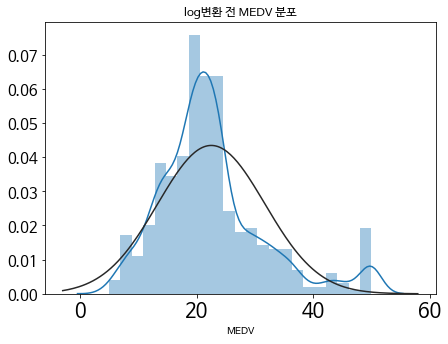

In [495]:
plt.figure(figsize=(7, 5))
sns.distplot((df['MEDV']),fit=norm)
plt.title('log변환 전 MEDV 분포')

Text(0.5, 1.0, 'log변환 후 MEDV 분포')

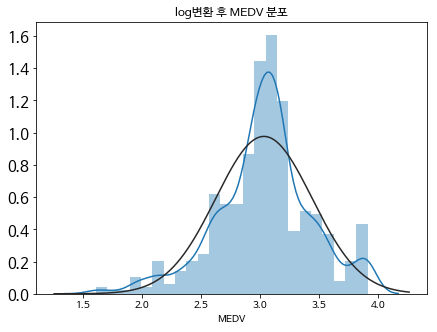

In [470]:
plt.figure(figsize=(7,5))
sns.distplot(np.log(df['MEDV']),norm_hist =False, fit=norm)
plt.title('log변환 후 MEDV 분포',)

# 상관계수 확인

In [350]:
df_corr = df.corr().reset_index()
df_corr.head()

,index,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,MEDV,1.0000,-0.3883,0.3604,-0.4837,0.1753,-0.4273,0.6954,-0.3770,0.2499,-0.3816,-0.4685,-0.5078,0.3335,-0.7377
1,CRIM,-0.3883,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556
2,ZN,0.3604,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130
3,INDUS,-0.4837,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038
4,CHAS,0.1753,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539


In [464]:
corr_medv = abs(df_corr[["MEDV"]])

In [465]:
corr_medv=corr_medv.sort_values(['MEDV']).reset_index(drop=True)

In [466]:
corr_medv

,MEDV
0,0.1753
1,0.2499
2,0.3335
3,0.3604
4,0.3770
5,0.3816
6,0.3883
7,0.4273
8,0.4685
9,0.4837


In [475]:
df_corr = df.corr()

In [482]:
cd = pd.DataFrame(abs(df_corr[["MEDV"]]["MEDV"]).sort_values())
cd

,MEDV
CHAS,0.1753
DIS,0.2499
B,0.3335
ZN,0.3604
AGE,0.3770
RAD,0.3816
CRIM,0.3883
NOX,0.4273
TAX,0.4685
INDUS,0.4837


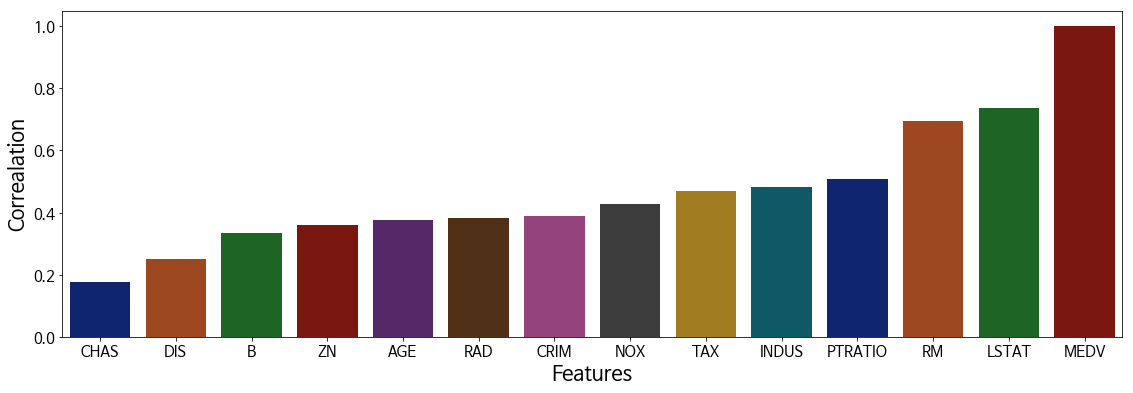

In [494]:
plt.figure(figsize=(19,6))

ax = sns.barplot(x=cd.index, y="MEDV", data=cd, palette='dark', )
ax.set_ylabel('Correalation',fontsize=20)
ax.set_xlabel('Features',fontsize=20)
plt.rc('xtick',labelsize=20)

In [351]:
corr_medv = pd.DataFrame(df.corr()["MEDV"].sort_values(ascending=False))

In [352]:
corr_medv[abs(corr_medv["MEDV"]) > 0.65]

,MEDV
MEDV,1.0000
RM,0.6954
LSTAT,-0.7377


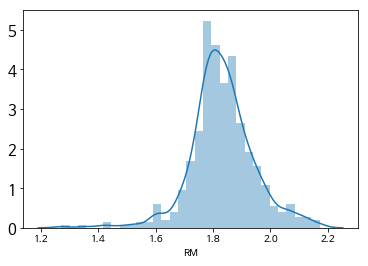

In [354]:
cols = df.columns.tolist()

In [355]:
box_cols = []
no_unique = []
for i in x :
    if len(df[i].unique()) > 100:
        box_cols.append(i)
    else :
        no_unique.append(i)

In [356]:
print('unique > 300 :',box_cols)
print('unique < 300 :',no_unique)

unique > 300 : ['CRIM', 'RM', 'AGE', 'DIS', 'B', 'LSTAT']
unique < 300 : ['ZN', 'INDUS', 'CHAS', 'NOX', 'RAD', 'TAX', 'PTRATIO']


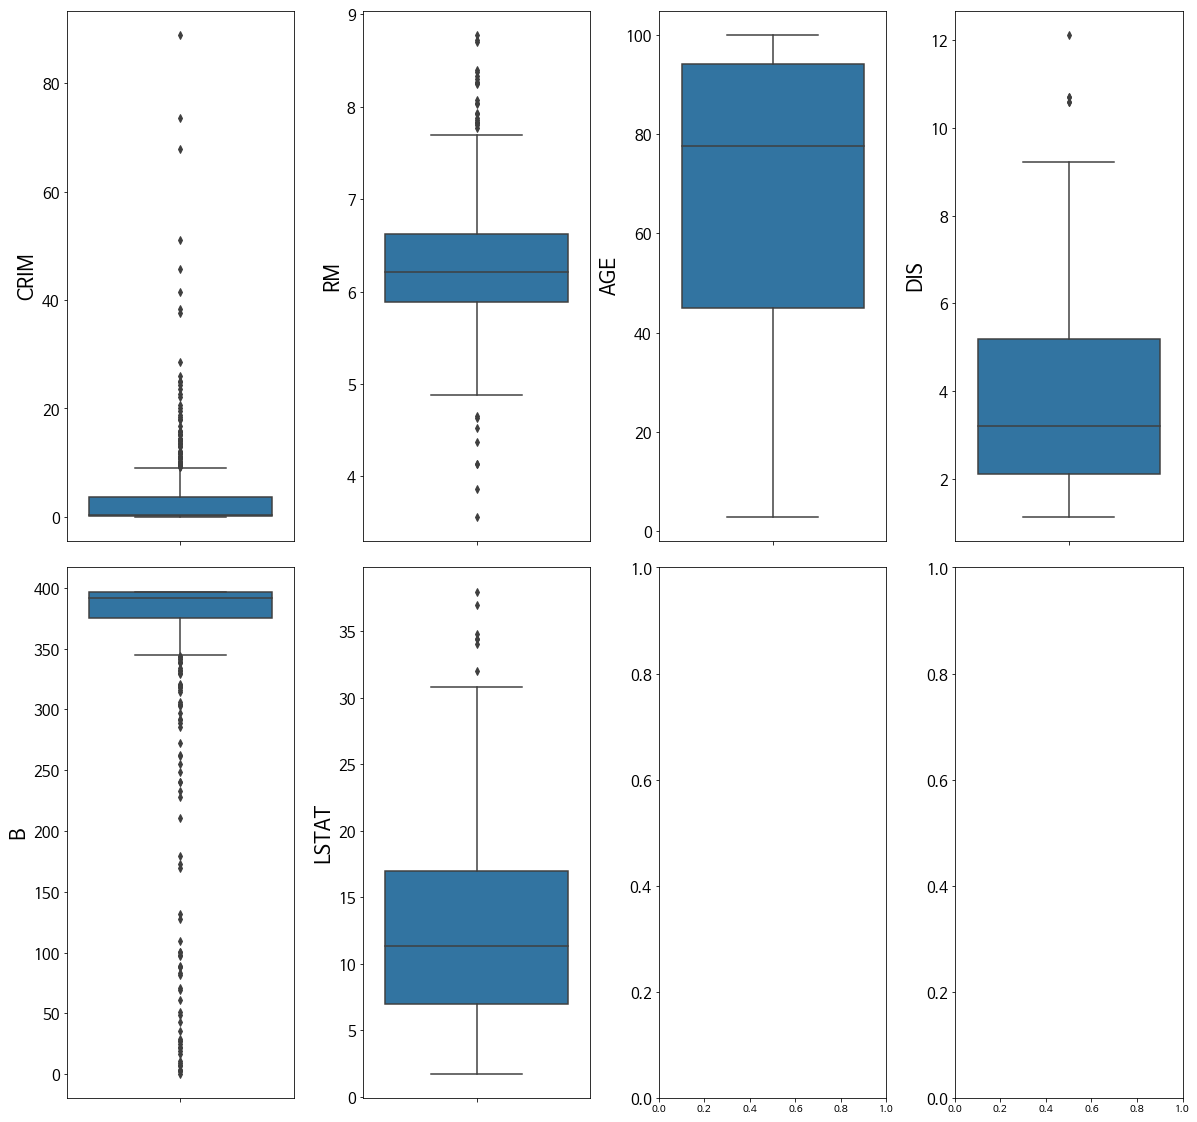

In [357]:
rows = 2
if((((len(box_cols) + 1) // rows) % rows) == 0): 
    cols = (len(box_cols)+1) // rows
else:
    cols = ((len(box_cols)+1) // rows) + ((len(box_cols) // rows) % rows)
plt.rc('ytick',labelsize=15)

fig, axs = plt.subplots(rows, cols, figsize=(20,20))
fig.subplots_adjust(hspace = 0.05, wspace=0.3)
axs = axs.ravel()
for j,k in enumerate(box_cols):
    b = sns.boxplot(y = k, data=df,ax = axs[j],)
    b.set_ylabel(k,fontsize=20)


### 이상치 확인

In [358]:
df[df["CRIM"] > 80]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
380,10.4000,88.9762,0.0000,18.1000,0,0.6710,6.9680,91.9000,1.4165,24,666,20.2000,396.9000,17.2100


In [359]:
df[df["DIS"] > 12]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
353,30.1000,0.0171,90.0000,2.0200,0,0.4100,6.7280,36.1000,12.1265,5,187,17.0000,384.4600,4.5000


In [360]:
df_40 = df[df["MEDV"] > 40].sort_values(by="MEDV", ascending = False)

In [361]:
df_40.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
372,50.0000,8.2673,0.0000,18.1000,1,0.6680,5.8750,89.6000,1.1296,24,666,20.2000,347.8800,8.8800
267,50.0000,0.5783,20.0000,3.9700,0,0.5750,8.2970,67.0000,2.4216,5,264,13.0000,384.5400,7.4400
161,50.0000,1.4634,0.0000,19.5800,0,0.6050,7.4890,90.8000,1.9709,5,403,14.7000,374.4300,1.7300
162,50.0000,1.8338,0.0000,19.5800,1,0.6050,7.8020,98.2000,2.0407,5,403,14.7000,389.6100,1.9200
163,50.0000,1.5190,0.0000,19.5800,1,0.6050,8.3750,93.9000,2.1620,5,403,14.7000,388.4500,3.3200


In [362]:
df_50 = df[df["MEDV"] > 49]

In [363]:
df_50.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
161,50.0000,1.4634,0.0000,19.5800,0,0.6050,7.4890,90.8000,1.9709,5,403,14.7000,374.4300,1.7300
162,50.0000,1.8338,0.0000,19.5800,1,0.6050,7.8020,98.2000,2.0407,5,403,14.7000,389.6100,1.9200
163,50.0000,1.5190,0.0000,19.5800,1,0.6050,8.3750,93.9000,2.1620,5,403,14.7000,388.4500,3.3200
166,50.0000,2.0102,0.0000,19.5800,0,0.6050,7.9290,96.2000,2.0459,5,403,14.7000,369.3000,3.7000
186,50.0000,0.0560,0.0000,2.4600,0,0.4880,7.8310,53.6000,3.1992,3,193,17.8000,392.6300,4.4500


## 유의 변수들 분포 확인

In [496]:
from scipy.stats import norm

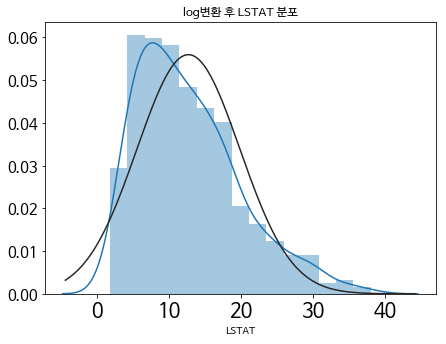

In [499]:
plt.figure(figsize=(7,5))
plt.title('log변환 후 LSTAT 분포',)
ax = sns.distplot(df["LSTAT"], fit=norm)

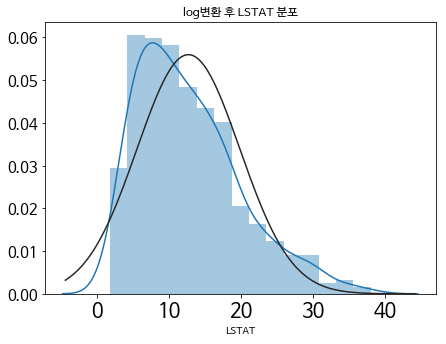

In [500]:
plt.figure(figsize=(7,5))
plt.title('log변환 후 LSTAT 분포',)
ax = sns.distplot(df["LSTAT"], fit=norm)

# 이상치 제거

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
MEDV       506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [368]:
df_after_outlier = df[df["CRIM"] < 79]
df_after_outlier = df_after_outlier[df_after_outlier["DIS"] < 11]
print(len(df_after_outlier))
df_after_outlier.head()

504


,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0000,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296,15.3000,396.9000,4.9800
1,21.6000,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242,17.8000,396.9000,9.1400
2,34.7000,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242,17.8000,392.8300,4.0300
3,33.4000,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222,18.7000,394.6300,2.9400
4,36.2000,0.0690,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222,18.7000,396.9000,5.3300


# 표준화 & 더미화

### 표준화

In [369]:
x = df_after_outlier.drop('MEDV', axis = 1)
y = df_after_outlier['MEDV']

In [370]:
from sklearn.preprocessing import Normalizer

In [371]:
nm = Normalizer()

In [372]:
normal_col = x.columns.tolist()

In [373]:
normal_col.remove("CHAS")

In [374]:
d = nm.fit(x[normal_col])

In [375]:
x[normal_col] = d.transform(x[normal_col])

In [376]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0000,0.0360,0.0046,0,0.0011,0.0131,0.1304,0.0082,0.0020,0.5919,0.0306,0.7937,0.0100
1,0.0001,0.0000,0.0150,0,0.0010,0.0136,0.1671,0.0105,0.0042,0.5126,0.0377,0.8408,0.0194
2,0.0001,0.0000,0.0152,0,0.0010,0.0154,0.1311,0.0107,0.0043,0.5194,0.0382,0.8431,0.0086
3,0.0001,0.0000,0.0048,0,0.0010,0.0154,0.1005,0.0133,0.0066,0.4873,0.0410,0.8662,0.0065
4,0.0002,0.0000,0.0048,0,0.0010,0.0156,0.1182,0.0132,0.0065,0.4842,0.0408,0.8656,0.0116


### 더미화

In [377]:
cate_cols = ["CHAS"]

In [378]:
x_d = pd.get_dummies(x, columns=["CHAS"], prefix="CHAS")

In [379]:
x_d.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_0,CHAS_1
0,0.0000,0.0360,0.0046,0.0011,0.0131,0.1304,0.0082,0.0020,0.5919,0.0306,0.7937,0.0100,1,0
1,0.0001,0.0000,0.0150,0.0010,0.0136,0.1671,0.0105,0.0042,0.5126,0.0377,0.8408,0.0194,1,0
2,0.0001,0.0000,0.0152,0.0010,0.0154,0.1311,0.0107,0.0043,0.5194,0.0382,0.8431,0.0086,1,0
3,0.0001,0.0000,0.0048,0.0010,0.0154,0.1005,0.0133,0.0066,0.4873,0.0410,0.8662,0.0065,1,0
4,0.0002,0.0000,0.0048,0.0010,0.0156,0.1182,0.0132,0.0065,0.4842,0.0408,0.8656,0.0116,1,0


# MODELING

In [380]:
# 절편 추가
x_const = sm.add_constant(x)
x_const.head()


/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0000,0.0000,0.0360,0.0046,0,0.0011,0.0131,0.1304,0.0082,0.0020,0.5919,0.0306,0.7937,0.0100
1,1.0000,0.0001,0.0000,0.0150,0,0.0010,0.0136,0.1671,0.0105,0.0042,0.5126,0.0377,0.8408,0.0194
2,1.0000,0.0001,0.0000,0.0152,0,0.0010,0.0154,0.1311,0.0107,0.0043,0.5194,0.0382,0.8431,0.0086
3,1.0000,0.0001,0.0000,0.0048,0,0.0010,0.0154,0.1005,0.0133,0.0066,0.4873,0.0410,0.8662,0.0065
4,1.0000,0.0002,0.0000,0.0048,0,0.0010,0.0156,0.1182,0.0132,0.0065,0.4842,0.0408,0.8656,0.0116


In [381]:
reg_multi_model = sm.OLS((y), x_const)
#적합
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     110.8
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          1.33e-136
Time:                        14:25:29   Log-Likelihood:                -1487.2
No. Observations:                 504   AIC:                             3002.
Df Residuals:                     490   BIC:                             3062.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9615      8.835      0.901      0.3

# 변수 선택

In [340]:
ds_vif = pd.DataFrame()
ds_vif['variable'] = x_const.columns
ds_vif["VIF"] = [variance_inflation_factor(x_const.values, i) for i in range(x_const.shape[1])]
ds_vif.sort_values("VIF", inplace=True)
ds_vif.round(3)

,variable,VIF
4,CHAS,1.0660
1,CRIM,1.9590
13,LSTAT,2.2920
2,ZN,2.3630
3,INDUS,2.4190
7,AGE,2.4230
5,NOX,2.4870
11,PTRATIO,2.8160
8,DIS,4.2360
9,RAD,4.5260


### VIF로 변수 선택해서 다시 돌리기

In [326]:
new_x = x.drop(['B','TAX'], axis = 1)

In [327]:
# 절편 추가
x_const_new = sm.add_constant(x)
x_const_new.head()

/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0000,0.0000,0.0360,0.0046,0,0.0011,0.0131,0.1304,0.0082,0.0020,0.5919,0.0306,0.7937,0.0100
1,1.0000,0.0001,0.0000,0.0150,0,0.0010,0.0136,0.1671,0.0105,0.0042,0.5126,0.0377,0.8408,0.0194
2,1.0000,0.0001,0.0000,0.0152,0,0.0010,0.0154,0.1311,0.0107,0.0043,0.5194,0.0382,0.8431,0.0086
3,1.0000,0.0001,0.0000,0.0048,0,0.0010,0.0154,0.1005,0.0133,0.0066,0.4873,0.0410,0.8662,0.0065
4,1.0000,0.0002,0.0000,0.0048,0,0.0010,0.0156,0.1182,0.0132,0.0065,0.4842,0.0408,0.8656,0.0116


In [328]:
x_const_new['LSTAT'] = np.log(x_const_new["LSTAT"])

### 변수 전부에 y랑 LSTATS에 log 변환

In [329]:
# Log 변환 -> LSTAT
reg_multi_model = sm.OLS(np.log(y), x_const_new)
#적합
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     141.8
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          1.27e-156
Time:                        14:10:27   Log-Likelihood:                 130.36
No. Observations:                 504   AIC:                            -232.7
Df Residuals:                     490   BIC:                            -173.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4009      0.353      3.964      0.0

In [337]:
#LSTAT에 로그 취하구 y에는 안 취하고
reg_multi_model = sm.OLS((y), x_const_new)
#적합
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     147.8
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          4.18e-160
Time:                        14:24:42   Log-Likelihood:                -1431.2
No. Observations:                 504   AIC:                             2890.
Df Residuals:                     490   BIC:                             2950.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.9242      7.832     -2.289      0.0

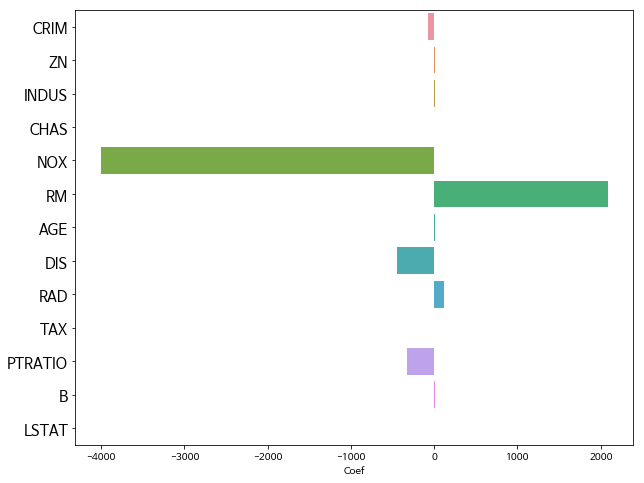

In [336]:
plt.figure(figsize = (10,8))
coef = pd.DataFrame({"Coef":reg_multi_results.params.values[1:]},
                           index=reg_multi_model.exog_names[1:])

# ds_reg_coef.plot.barh(y='Coef', legend = True, )
sns.barplot(data=coef, x = 'Coef', y =coef.index)

In [260]:
# LSTAT로그 취하기전
reg_multi_model = sm.OLS(np.log(y), x_const_new)
#적합
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     120.4
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          3.33e-143
Time:                        12:14:26   Log-Likelihood:                 98.378
No. Observations:                 504   AIC:                            -168.8
Df Residuals:                     490   BIC:                            -109.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6603      0.380      6.999      0.0

In [338]:
model = LinearRegression()
rfe = RFE(estimator= model, n_features_to_select=5).fit(x, (y))

#선택된 변수
selected_cols = x.columns[rfe.support_]
removed_cols = x.columns[~rfe.support_]

print("Selected features:{}".format(selected_cols))
print("Removed features:{}".format(removed_cols))      

Selected features:Index(['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
Removed features:Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'B'], dtype='object')


In [339]:
x_rfe = sm.add_constant(x_const[selected_cols])
reg_multi_rfe_model = sm.OLS(y, x_rfe)
reg_multi_rfe_results = reg_multi_rfe_model.fit()
print(reg_multi_rfe_results.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     251.9
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          7.50e-134
Time:                        14:24:58   Log-Likelihood:                -1514.9
No. Observations:                 504   AIC:                             3042.
Df Residuals:                     498   BIC:                             3067.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3378      1.559     11.765      0.0

/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


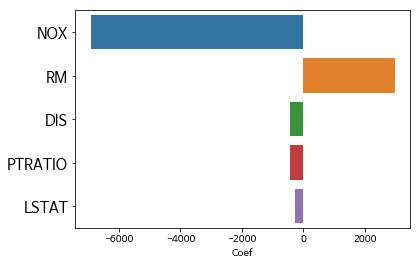

In [333]:

ds_reg_coef = pd.DataFrame({"Coef":reg_multi_rfe_results.params.values[1:]},
                           index=reg_multi_rfe_model.exog_names[1:])

# ds_reg_coef.plot.barh(y='Coef', legend = True, )
sns.barplot(data=ds_reg_coef, x = 'Coef', y =ds_reg_coef.index)